# Exercise 08 Solutions

## Exercise 08.1
Plotting a function, then an interactive plot 

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


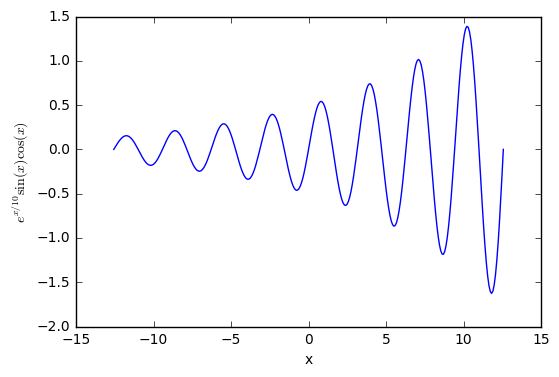

In [1]:
from ipywidgets import interact
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot(ω_1 = 1, ω_2 = 1):
    x = np.linspace(-4*np.pi, 4*np.pi, num=300)
    y = np.exp(x / 10)*np.sin(ω_1 * x)*np.cos(ω_2 * x)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('$e^{x/10} \sin(x)\cos(x)$');

plot()

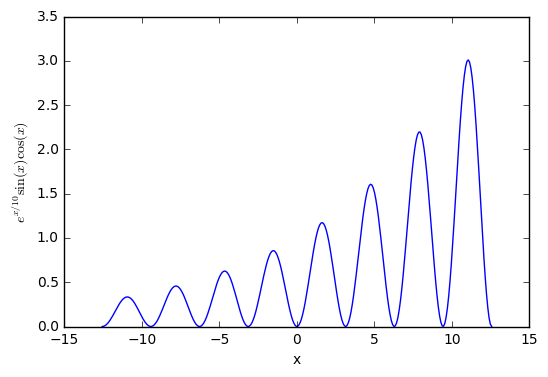

In [2]:
interact(plot, ω_1=(0, 2, 0.2), ω_2=(0, 2, 0.2));

## Exercise 08.2
Multi-graph plotting

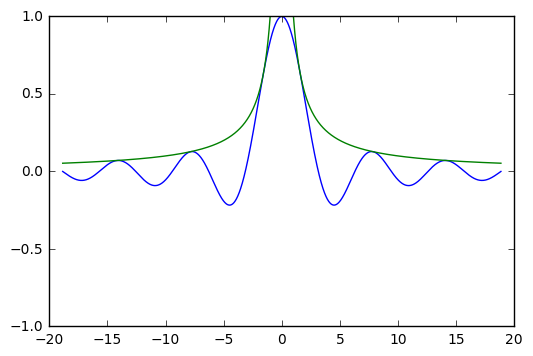

In [3]:
x = np.linspace(-6*np.pi, 6*np.pi, num=3000)
y1 = np.sin(x)/x

y2 = 1/np.abs(x)

plt.plot(x,y1);
plt.plot(x,y2);

plt.ylim(-1,1);

## Exercise 08.3
Population plot

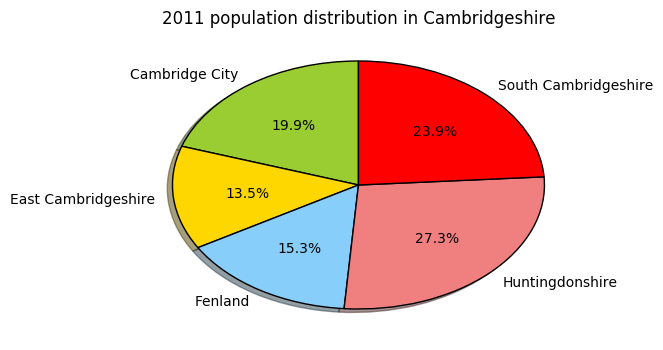

In [4]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
init_population = (123900, 83800, 95300, 169500, 148800)

# Specify slice colours 
# (see http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']



def calc_pop(year=2011, CC=0, EC=0, F=0, H=0, SC=0,exploder=0):
    explode = (exploder,exploder, exploder, exploder, exploder)  
    
    add_pop = np.float_(init_population)*np.float_([CC, EC, F, H, SC])*(year-2011)/100
    
    new_pop = np.round(add_pop + np.float_(init_population))
    
    # Produce pie chart. The slices will be ordered and plotted counter-clockwise.
    plt.pie(new_pop, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

    # Add title
    if year >2011:
        plt.title("Estimated {} population distribution in Cambridgeshire".format(year));
    else:
        plt.title("2011 population distribution in Cambridgeshire");

   
interact(calc_pop, year=(2011, 2021,1), CC=(0,10,0.2), EC=(0,10,0.2),\
         F=(0,10,0.2), H=(0,10,0.2), SC=(0,10,0.2), exploder=(0,1,0.01));







## Exercise 08.4
Creating a plot for crime data for Gonville and Caius College

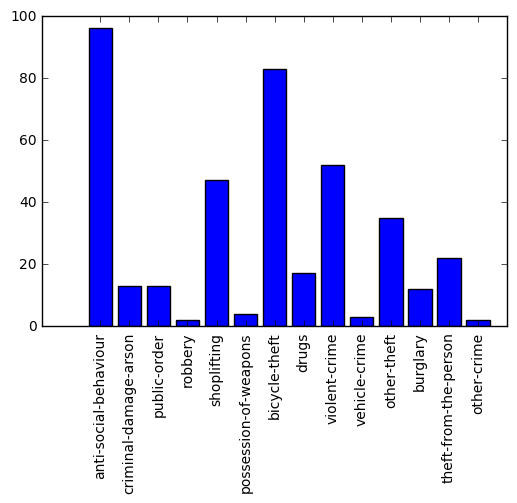

In [14]:
import json
import requests

# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'

categories_freq = {}

# year-month of interest
year_month = '2016-05'

# Construct request URL string using the above data
url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month

# Fetch data from https://data.police.uk
r = requests.get(url)

crime_data = r.json()

# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        categories_freq[category]+=1
    else:
        categories_freq[category]=1



plt.bar(range(len(categories_freq)), categories_freq.values(), align='center');
plt.xticks(range(len(categories_freq)), categories_freq.keys(), rotation='vertical');